### Code Implementation

In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten , Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import pickle
from matplotlib import pyplot as plt

### Loading Dataset

In [2]:
# # Loading the dataset and perform splitting
# data_list = []
# labels_list = []
# classes_list = 43

# imgs_path = "../input/gtsrb-german-traffic-sign/Train"
# for i in range(classes_list):
#     i_path = os.path.join(imgs_path, str(i)) #0-42
#     for img in os.listdir(i_path):
#         im = Image.open(i_path +'/'+ img)
#         im = im.resize((32,32))
#         im = np.array(im)
#         data_list.append(im)
#         labels_list.append(i)
# data = np.array(data_list)
# labels = np.array(labels_list)

In [2]:
# Opening file for reading in binary mode
with open('D:\Project\Traffic Sign Detection\DATABASE/data8.pickle', 'rb') as f:
    gray_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
gray_data['x_train'] = gray_data['x_train'].transpose(0, 2, 3, 1)
gray_data['x_validation'] = gray_data['x_validation'].transpose(0, 2, 3, 1)
gray_data['x_test'] = gray_data['x_test'].transpose(0, 2, 3, 1)

gray_train_imgs = gray_data['x_train']
gray_test_imgs = gray_data['x_test']
gray_train_labels = gray_data['y_train']
gray_test_labels = gray_data['y_test']
gray_valid_imgs = gray_data['x_validation']
gray_valid_labels = gray_data['y_validation']

In [3]:
gray_train_labels[gray_train_labels <= 10] = 0 #cycle
gray_train_labels[gray_train_labels >= 32] = 0 #cycle
gray_train_labels[(gray_train_labels == 15) |(gray_train_labels == 16)| (gray_train_labels ==17)] = 0#cycle
gray_train_labels[(gray_train_labels >= 18) & (gray_train_labels <= 31)] = 1 #triangle
gray_train_labels[(gray_train_labels == 13) | (gray_train_labels == 11)] = 1 #triangle
gray_train_labels[gray_train_labels == 14] = 0 # 6
gray_train_labels[gray_train_labels == 12] = 1 # 4


gray_test_labels[gray_test_labels <= 10] = 0 #cycle
gray_test_labels[gray_test_labels >= 32] = 0 #cycle
gray_test_labels[(gray_test_labels == 15) |(gray_test_labels == 16)| (gray_test_labels ==17)] = 0 #cycle
gray_test_labels[(gray_test_labels >= 18) & (gray_test_labels <= 31)] = 1 #triangle
gray_test_labels[(gray_test_labels == 13) | (gray_test_labels == 11)] = 1 #triangle
gray_test_labels[gray_test_labels == 14] = 0 # 6
gray_test_labels[gray_test_labels == 12] = 1 # 4

gray_valid_labels[gray_valid_labels <= 10] = 0 #cycle
gray_valid_labels[gray_valid_labels >= 32] = 0 #cycle
gray_valid_labels[(gray_valid_labels == 15) |(gray_valid_labels == 16)| (gray_valid_labels ==17)] = 0 #cycle
gray_valid_labels[(gray_valid_labels >= 18) & (gray_valid_labels <= 31)] = 1 #triangle
gray_valid_labels[(gray_valid_labels == 13) | (gray_valid_labels == 11)] = 1 #triangle
gray_valid_labels[gray_valid_labels == 14] = 0 # 6
gray_valid_labels[gray_valid_labels == 12] = 1 # 4


### Image Data Preprocessing

In [4]:
# Peforming reshaping operation
# x_train = gray_train_imgs.reshape(gray_train_imgs.shape[0], 28, 28, 1)
# x_test = gray_test_imgs.reshape(gray_test_imgs.shape[0], 28, 28, 1)

x_train = gray_train_imgs
x_test = gray_test_imgs
x_valid = gray_valid_imgs
# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 2

# One Hot Encoding
y_train = keras.utils.to_categorical(gray_train_labels, num_class_shape)
y_test = keras.utils.to_categorical(gray_test_labels, num_class_shape)
y_valid = keras.utils.to_categorical(gray_valid_labels, num_class_shape)

In [19]:
a, x_train, b, y_train = train_test_split(gray_train_imgs, y_train, test_size=0.36, random_state=42)

### LeNet Model Architecture

In [5]:
keras.backend.clear_session()

In [6]:
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [7]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1 , validation_data = (x_valid , y_valid))

Epoch 1/20
680/680 [==============================] - 22s 23ms/step - loss: 0.0394 - accuracy: 0.9841 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 2/20
680/680 [==============================] - 15s 22ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 5.8805e-04 - val_accuracy: 1.0000
Epoch 3/20
680/680 [==============================] - 15s 22ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 4/20
680/680 [==============================] - 15s 22ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 6.4750e-04 - val_accuracy: 0.9998
Epoch 5/20
680/680 [==============================] - 15s 22ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9998
Epoch 6/20
680/680 [==============================] - 15s 22ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0013 - val_accuracy: 0.9998
Epoch 7/20
680/680 [==============================] - 15s 22ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 1.0189e-04 - v

#### all data

In [9]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 2s 6ms/step - loss: 0.0243 - accuracy: 0.9966
Test Loss: 0.024264587089419365
Test accuracy: 0.9965953826904297


In [10]:
from sklearn.metrics import classification_report
pred = model.predict(x_test).argmax(axis = 1)
cr = classification_report(y_test.argmax(axis = 1) , pred , output_dict = True)
print(cr)

395/395 [==============================] - 1s 3ms/step
{'0': {'precision': 0.9955098664776084, 'recall': 0.9994068801897983, 'f1-score': 0.997454566980406, 'support': 8430}, '1': {'precision': 0.9988000959923207, 'recall': 0.9909523809523809, 'f1-score': 0.9948607625194215, 'support': 4200}, 'accuracy': 0.9965954077593032, 'macro avg': {'precision': 0.9971549812349645, 'recall': 0.9951796305710896, 'f1-score': 0.9961576647499137, 'support': 12630}, 'weighted avg': {'precision': 0.9966040045585103, 'recall': 0.9965954077593032, 'f1-score': 0.9965920191786535, 'support': 12630}}


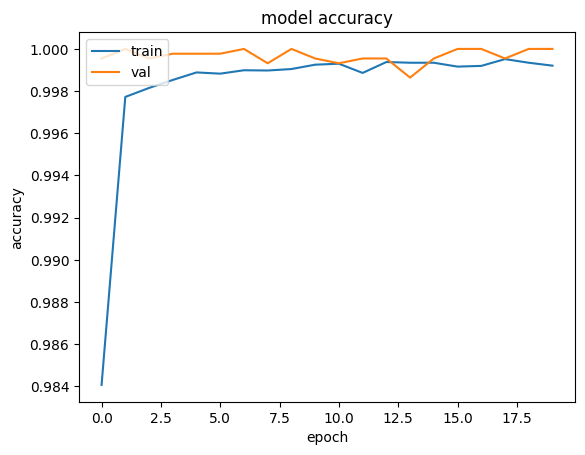

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

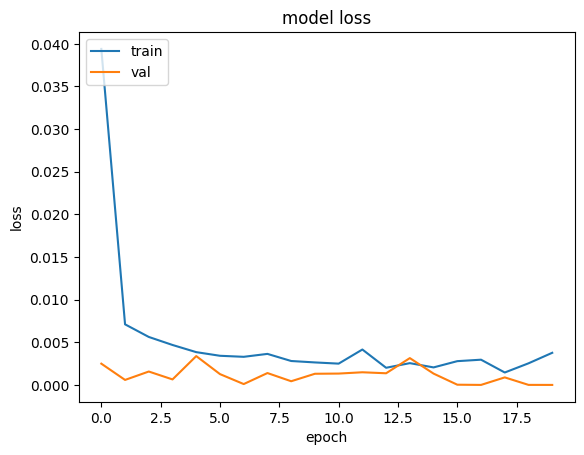

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### 36% data

In [24]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 2s 5ms/step - loss: 0.0161 - accuracy: 0.9982
Test Loss: 0.01607608050107956
Test accuracy: 0.9981789588928223


In [25]:
from sklearn.metrics import classification_report
pred = model.predict(x_test).argmax(axis = 1)
cr = classification_report(y_test.argmax(axis = 1) , pred , output_dict = True)
print(cr)

395/395 [==============================] - 1s 3ms/step
{'0': {'precision': 0.998813338079981, 'recall': 0.9984578884934757, 'f1-score': 0.9986355816574717, 'support': 8430}, '1': {'precision': 0.9969069712110398, 'recall': 0.9976190476190476, 'f1-score': 0.9972628823039391, 'support': 4200}, 'accuracy': 0.998178939034046, 'macro avg': {'precision': 0.9978601546455104, 'recall': 0.9980384680562617, 'f1-score': 0.9979492319807054, 'support': 12630}, 'weighted avg': {'precision': 0.9981793918527797, 'recall': 0.998178939034046, 'f1-score': 0.9981791020624726, 'support': 12630}}


In [26]:
model_save_dir = "D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_3_4_VS_cir_6_acc9983_36percent.h5"  

model.save(model_save_dir)

In [ ]:
import joblib 

# save model with joblib 
filename = 'joblib_model.sav'
joblib.dump(model, filename)

In [ ]:
x_test[1].shape

## Hope you like it!

In [ ]:
from matplotlib import pyplot as plt
image = gray_test_imgs[5]#.transpose(2 , 0 ,1)
# plt.imshow(image, cmap=plt.get_cmap('gray'))
# plt.show()
y = model.predict(image)
print(y)